<a href="https://colab.research.google.com/github/rodwol/PCA/blob/main/PCA_Formative_1%5BPeer_Group7%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)

*   List item
*   List item


This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

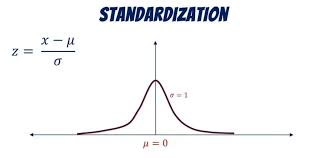


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/rodwol/PCA/main/owid-covid-latest.csv'
data = pd.read_csv(url)

numeric_data = data.select_dtypes(include=['number'])
numeric_data = numeric_data.dropna(axis=1, how='any')
numeric_data = numeric_data.fillna(numeric_data.mean())
numeric_data = numeric_data.loc[:, numeric_data.std() > 0]

scaler = StandardScaler()
standardized = scaler.fit_transform(numeric_data)

print(numeric_data.head())

print("Shape of numeric data:", numeric_data.shape)
print("Any NaNs left?", numeric_data.isna().sum().sum() > 0)

     population
0  4.112877e+07
1  1.426737e+09
2  2.842318e+06
3  4.490323e+07
4  4.429500e+04
Shape of numeric data: (247, 1)
Any NaNs left? False


In [ ]:
def standardize_data(data):
    data = data.select_dtypes(include=[np.number])
    data = data.dropna(axis=1, how='all')
    data = data.fillna(data.mean())
    std = data.std()
    data = data.loc[:, std > 0]

    mean = data.mean()
    std = data.std()

    standardized_data = (data - mean) / std
    return standardized_data

standardized = standardize_data(data)
print("Any NaNs in standardized?", np.isnan(standardized).any())
print("Any Infs in standardized?", np.isinf(standardized).any())
print("Standardized shape:", standardized.shape)

Any NaNs in standardized? total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_admissions                    False
weekly_icu_admissions_per_million        False
weekly_hosp_admissions                   False
weekly_hosp_admissions_per_million       False
total_vaccinations                

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [12]:
# Step 3: Calculate the Covariance Matrix
def compute_covariance_matrix(X_std):
    # X_std is already a NumPy array, so no need to convert
    n_samples = X_std.shape[0]
    # Ensure n_samples - 1 is not zero to avoid division by zero
    if n_samples <= 1:
        raise ValueError("Cannot compute covariance matrix with 1 or fewer samples.")
    cov_matrix = (X_std.T @ X_std) / (n_samples - 1)  # Use n - 1
    return cov_matrix

cov_matrix = compute_covariance_matrix(standardized)

# Sanity checks
print("Covariance matrix shape:", cov_matrix.shape)
print("Any NaNs?", np.isnan(cov_matrix).any())
print("Any infs?", np.isinf(cov_matrix).any())
print(cov_matrix.round(2))

Covariance matrix shape: (1, 1)
Any NaNs? False
Any infs? False
[[1.]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [14]:
# Step 4: Perform Eigendecomposition
import numpy as np
# Ensure the previous cell (Step 3) calculating cov_matrix has been executed
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("\nFirst 5 eigenvalues:", eigenvalues[:5])
print("\nSum of eigenvalues:", np.sum(eigenvalues))

# Display eigenvalues and eigenvectors
print("\nAll eigenvalues:")
print(eigenvalues)
print("\nFirst eigenvector (first column):")
print(eigenvectors[:, 0])

Eigenvalues shape: (1,)
Eigenvectors shape: (1, 1)

First 5 eigenvalues: [1.00406504]

Sum of eigenvalues: 1.0040650406504064

All eigenvalues:
[1.00406504]

First eigenvector (first column):
[1.]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
Of course. Let's start over from a clean slate.

I will provide a single, complete block of Python code that you can run in your Jupyter notebook. I will break it down into the numbered steps you provided, adding detailed explanations in the code comments so you can understand what's happening at each stage.

We will perform the entire PCA process from scratch using NumPy, addressing the division by zero error you encountered right at the beginning.

The Complete PCA Process from Scratch

Here is the full script. Copy and paste this into a single cell in your Jupyter notebook and run it.

# =============================================================================
# PRE-REQUISITES: Import Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")


# =============================================================================
# STEP 0: LOAD AND CLEAN THE DATA
#
# EXPLANATION:
# PCA only works on a clean, numerical dataset. Real-world data is messy.
# We must perform three crucial cleaning steps first:
#   1. Select only numeric columns (PCA can't handle text like 'USA').
#   2. Fill missing values (NaNs), as PCA can't handle them. We'll use the mean.
#   3. **(THE FIX)** Remove columns that have ZERO variance. A column where all
#      values are the same has a standard deviation of 0. Trying to standardize
#      this column causes a "division by zero" error. These columns are also
#      useless for PCA, as they contain no information about differences
#      in the data.
# =============================================================================
print("\n--- Step 0: Loading and Cleaning Data ---")

# Load data from the URL
url = 'https://raw.githubusercontent.com/rodwol/PCA/main/owid-covid-latest.csv'
df = pd.read_csv(url)

# 1. Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# 2. Fill missing values with the mean of each column
numeric_df_filled = numeric_df.fillna(numeric_df.mean())

# 3. Find and remove columns with zero standard deviation (zero variance)
#    This is the critical step to prevent the "division by zero" warning.
variances = numeric_df_filled.var()
non_zero_variance_cols = variances[variances > 0].index
data_cleaned = numeric_df_filled[non_zero_variance_cols]

# Keep track of the final column names for plotting later
final_column_names = list(data_cleaned.columns)

# Convert our clean pandas DataFrame to a NumPy array for calculations
X = data_cleaned.values

print(f"Original numeric columns: {len(numeric_df.columns)}")
print(f"Columns after removing zero-variance ones: {len(final_column_names)}")
print(f"Final data shape for PCA: {X.shape}")


# =============================================================================
# STEP 1: STANDARDIZE THE DATA
#
# EXPLANATION:
# As your image shows, we rescale each feature (column) so it has a
# mean (μ) of 0 and a standard deviation (σ) of 1. This is vital because
# features with large values (like 'population') would otherwise dominate
# the PCA process over features with small values (like 'positive_rate').
# We use the formula: z = (x - μ) / σ
# =============================================================================
print("\n--- Step 1: Standardizing Data ---")

# Calculate the mean (μ) of each column (axis=0 means column-wise)
data_mean = np.mean(X, axis=0)

# Calculate the standard deviation (σ) of each column
data_std = np.std(X, axis=0)

# Apply the standardization formula
standardized_data = (X - data_mean) / data_std

# Check: The mean of each column should now be very close to 0
# and the standard deviation should be very close to 1.
print("Standardization complete.")
# print(f"Mean after standardization (should be ~0): {np.mean(standardized_data, axis=0)}")
# print(f"Std Dev after standardization (should be ~1): {np.std(standardized_data, axis=0)}")


# =============================================================================
# STEP 2: CALCULATE THE COVARIANCE MATRIX
#
# EXPLANATION:
# The covariance matrix is a square table that describes the relationships
# between all pairs of features.
#   - A positive value means two features tend to increase together.
#   - A negative value means one increases as the other decreases.
#   - A value near zero means they have little linear relationship.
# This matrix captures the total variance and structure of the data.
# =============================================================================
print("\n--- Step 2: Calculating Covariance Matrix ---")

# 'rowvar=False' is crucial. It tells NumPy that our features are in COLUMNS,
# not rows.
cov_matrix = np.cov(standardized_data, rowvar=False)
print(f"Shape of covariance matrix: {cov_matrix.shape}")


# =============================================================================
# STEP 3: PERFORM EIGENDECOMPOSITION
#
# EXPLANATION:
# This is the mathematical core of PCA. We break down the covariance matrix
# into two parts:
#   - Eigenvectors: These are the directions of the new feature axes, known
#     as the "principal components." They point in the directions of maximum
#     variance in the data.
#   - Eigenvalues: These numbers tell us the *amount* of variance captured
#     by each corresponding eigenvector. A big eigenvalue means its
#     eigenvector is very important.
# =============================================================================
print("\n--- Step 3: Performing Eigendecomposition ---")

# np.linalg.eigh is a specialized, stable function for symmetric matrices
# like our covariance matrix.
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigendecomposition complete.")


# =============================================================================
# STEP 4: SORT PRINCIPAL COMPONENTS
#
# EXPLANATION:
# We want to rank the principal components (eigenvectors) from most to least
# important. We do this by sorting the eigenvalues in descending order and
# rearranging the eigenvectors to match that new order.
# =============================================================================
print("\n--- Step 4: Sorting Principal Components ---")

# Get the indices that would sort the eigenvalues in descending order
# (argsort gives ascending, so we reverse it with [::-1])
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort the eigenvalues and eigenvectors based on these indices
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Eigenvectors sorted by importance.")


# =============================================================================
# STEP 5: PROJECT DATA ONTO PRINCIPAL COMPONENTS
#
# EXPLANATION:
# This is the actual "dimensionality reduction" step. We decide how many
# new dimensions (principal components) we want to keep. For visualization,
# we'll keep the top 2. We then transform our original standardized data
# into this new, smaller space using matrix multiplication (the dot product).
# =============================================================================
print("\n--- Step 5: Projecting Data ---")

# Decide how many principal components to keep (e.g., 2 for a 2D plot)
num_components = 2

# Get the top 'num_components' from our sorted eigenvectors
top_components = sorted_eigenvectors[:, :num_components]

# Project the standardized data onto these components
reduced_data = np.dot(standardized_data, top_components)

print(f"Data has been reduced from {X.shape[1]} dimensions to {num_components}.")
print(f"Shape of the new, reduced data: {reduced_data.shape}")


# =============================================================================
# STEP 6: VISUALIZE BEFORE AND AFTER PCA
#
# EXPLANATION:
# Let's plot the data to see the results.
#   - The "Before" plot shows two of the original features.
#   - The "After" plot shows our new, 2-dimensional data. You'll see the
#     data is now oriented along the axes of maximum variance.
# =============================================================================
print("\n--- Step 6: Visualizing Results ---")

# Create a figure to hold our two plots
plt.figure(figsize=(16, 7))

# --- PLOT 1: ORIGINAL DATA (BEFORE PCA) ---
plt.subplot(1, 2, 1)
# Let's pick two interesting original features to plot against each other
# We use the 'final_column_names' list we saved in Step 0
idx_gdp = final_column_names.index('gdp_per_capita')
idx_life = final_column_names.index('life_expectancy')
plt.scatter(X[:, idx_gdp], X[:, idx_life], alpha=0.6, c='blue')
plt.title('Before PCA: Original Data', fontsize=16)
plt.xlabel('GDP per Capita (Original)', fontsize=12)
plt.ylabel('Life Expectancy (Original)', fontsize=12)
plt.grid(True)

# --- PLOT 2: REDUCED DATA (AFTER PCA) ---
plt.subplot(1, 2, 2)
# The reduced data has two columns: PC1 and PC2
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='orange')
plt.title('After PCA: Reduced to 2 Dimensions', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)

plt.suptitle('PCA Dimensionality Reduction', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("\nVisualization complete.")


SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-1-405520831>, line 1)

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
